Applying: 
iter:39	d_norm:43.2668	obj:78.0592
Complete!
--------
Result
--------
+ Model: Weighted
  - lambda:                      2
  - delta:                    0.01
  - k:                          21
  - v:                         0.5
+ Minimizer: LBFGS
  - Max Iteration:             inf
  - Tolerance:              0.0001
  - s:                           1
  - m:                          20
  - gamma:                     0.1
  - sigma:                     0.5
  - max_line_search_iter:       10
+ Performance:
  - Data Shape:             2 x 60
  - Iteration Times:            39
  - Duration:               0.612s
  - Number of Clusters:          8
  - Number of Classes:           3
  - Compression Ratio:       0.935
  - Homogeneity:             1.000
  - Completeness:            0.770
  - V-measure(beta=1):       0.870


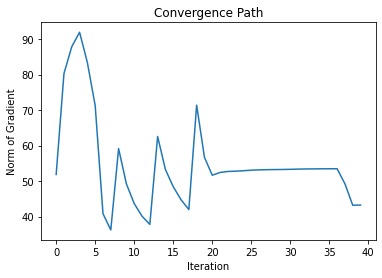

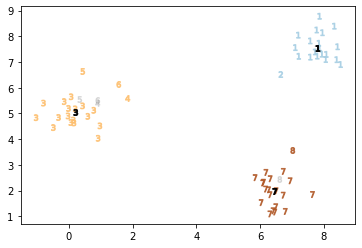

In [5]:
from tools.datasets import DataGenerator
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline


data_generator = DataGenerator(p=3, sep=10, seed=10)
data, label = data_generator.get_data()

from tools.full_model import MyCluster

general_param={
    'data':data,
    'lambda_':2
}

model_param={
    'model':'Weighted',
    'delta': 0.01,
    'k':21,
    'v':0.5
}

minimizer_param={
    'minimizer': 'LBFGS',
    'tol': 10**(-4),
    's': 1,
    'm': 20,
    'gamma': 0.1,
    'sigma': 0.5,
    'max_line_search_iter': 10
}

my_cluster=MyCluster(**general_param,**model_param,**minimizer_param)


my_cluster.optimize()

my_cluster.solution_to_cluster(epsilon=0.01)
my_cluster.get_result_panel(label,beta=1)
my_cluster.plot2d(data_generator)